# Bibliotecas y datos

In [2]:
import numpy as np
import pandas as pd

#preprocesar texto
import nltk
from nltk.corpus import stopwords
import re

from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import MultinomialNB  

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

nltk.download('stopwords')

import matplotlib.pyplot as plt        #Para graficar y visualizar
import seaborn as sns


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
def preprocesar(texto):
  #convierte a minúsculas
  texto = texto.lower()

  #elimina stopwords
  stop = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
  texto = stop.sub('', texto) 


  #quita direcciones html
  borrar = re.compile('<.*?>')
  texto= re.sub(borrar, '', texto)

  #quita puntuaciones y todo lo que no sea letra y números
  texto = re.sub('[^A-ZÜÖÄa-z0-9]+', ' ', texto)

  #quita numeros
  texto = re.sub(" \d+", " ", texto)
  

  return(texto)

In [4]:
datos=pd.read_csv('https://raw.githubusercontent.com/AnIsAsPe/ElementosEstadisticaMachineLearningPython/master/Semana8/spam_ham_dataset.csv',
                  usecols=['text','label_num'] )
datos.columns=['text','spam']
print(datos.shape)
datos.head()

(5171, 2)


,text,spam
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [5]:
datos['spam'].value_counts(normalize=True)

0    0.710114
1    0.289886
Name: spam, dtype: float64

# Preprocesar

In [26]:
datos.loc[5,'text']

'Subject: ehronline web address change\r\nthis message is intended for ehronline users only .\r\ndue to a recent change to ehronline , the url ( aka " web address " ) for accessing ehronline needs to be changed on your computer . the change involves adding the letter " s " to the " http " reference in the url . the url for accessing ehronline should be : https : / / ehronline . enron . com .\r\nthis change should be made by those who have added the url as a favorite on the browser .'

In [6]:
preprocesar(datos.loc[5,'text'])

'subject ehronline web address change message intended ehronline users due recent change ehronline url aka web address accessing ehronline needs changed computer change involves adding letter http reference url url accessing ehronline https ehronline enron com change made added url favorite browser '

In [7]:

datos['text']=datos['text'].apply(preprocesar)


#Vectorizar texto (X)

In [8]:
#Vectorizar texto
cv = CountVectorizer()
mdt_frec = cv.fit_transform(datos['text']) 
terminos= cv.get_feature_names()
X = pd.DataFrame(mdt_frec.todense(), 
                              index=datos.index, 
                              columns=terminos)
print(X.shape)
X.head()                                                       


(5171, 45598)


,aa,aaa,aaas,aabda,aabvmmq,aac,aachecar,aaer,aafco,aaiabe,aaigrcrb,aaihmqv,aaldano,aalland,aambique,aamlrg,aaoeuro,aare,aarhus,aaron,aashqcsny,aavilable,aaxrzm,ab,aba,ababa,abacha,aback,abackof,abacus,abacustech,abandon,abandone,abandoned,abarch,abasements,abash,abashed,abate,abater,...,zv,zve,zvikydqu,zvjc,zvp,zvrkxjmex,zvx,zw,zwallet,zwdm,zwftnqlp,zwiers,zwmdjvr,zwoegen,zwu,zxaghur,zxgwvpiadobe,zxgwvpihere,zxgwvpiimg,zxgwvpimacromedia,zxgwvpimicrosoft,zxgwvpinorton,zxjcxz,zxklh,zxzmcnbf,zyban,zyjvit,zykfe,zyl,zynsdirnh,zynve,zyqtaqlt,zyrtec,zyyqywp,zzezrjok,zzn,zzo,zzocb,zzso,zzsyt
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
y = datos['spam']

In [13]:
X.shape

(5171, 45598)

# Separar conjunto de entrenamiento y prueba

In [10]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                     random_state=3, shuffle=True)

print('e-mail totales: {}'.format(datos.shape[0]))
print('e-mail de entrenamiento: {}'.format(X_train.shape[0]))
print('e-mail de prueba: {}'.format(X_test.shape[0]))

e-mail totales: 5171
e-mail de entrenamiento: 3619
e-mail de prueba: 1552


In [11]:
#proporción de emails por clase en el conjunto de entrenamiento
y_train.value_counts(normalize=True)

0    0.709036
1    0.290964
Name: spam, dtype: float64

In [12]:
#proporción de emails por clases en el conjunto de prueba
y_test.value_counts(normalize=True)

0    0.712629
1    0.287371
Name: spam, dtype: float64

#  Clasificador Naive-Bayes 


##Entrenamiento

In [15]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Evaluación del modelo

In [16]:
y_pred = naive_bayes.predict(X_test)

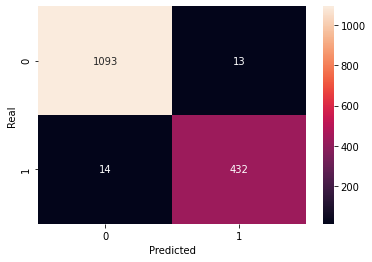

In [17]:
data = {'Y_Real':  y_test,
        'Y_Prediccion':y_pred
        }

df = pd.DataFrame(data, columns=['Y_Real','Y_Prediccion'])
confusion_matrix = pd.crosstab(df['Y_Real'], df['Y_Prediccion'], rownames=['Real'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.show()

In [18]:

print('Exactitud: ', format(accuracy_score(y_test, y_pred)))

# emails clasificados como spam que realmente lo son entre todos los clasificados como spam
print('\nPrecisión: ', format(precision_score(y_test, y_pred)))  

# emails clasificados como spam que realmente lo son entre todos los spam
print('\nSensibilidad: ', format(recall_score(y_test, y_pred)))

#Peso medio entre Presición y Sensibilidad
print('\nF1 score: ', format(f1_score(y_test, y_pred)))

Exactitud:  0.9826030927835051

Precisión:  0.9707865168539326

Sensibilidad:  0.968609865470852

F1 score:  0.9696969696969697
